# Wine White vs Red

In [1]:
#Biblioteca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from Perceptron import Perceptron


#### Carregamento de dados

In [2]:
data_red = pd.read_csv('winequality-red.csv',sep=';')
data_white = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
data_red


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Criacao de coluna para cada dataframe white 0 e red 1 para poder juntas os 2

In [5]:
data_white['color'] = 0  # 0 para branco
data_red['color'] = 1  # 1 para tinto


# Concatenar os dados
wine_data = pd.concat([data_red, data_white], ignore_index=True)

In [6]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
# Separar variáveis independentes e dependentes
X = wine_data.drop(['quality', 'color'], axis=1)
y = wine_data['color']

Separar em 70% treino e 30% teste e normalizar os dados

In [8]:
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Aplicando o PCA para diminuir as dimensões para 2

In [9]:
# Aplicar PCA
pca = PCA(n_components=2)  # Reduzir para 2 componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Treinar e testar os modelo

In [10]:
# Treinar o modelo Perceptron com os dados transformados
perceptron = Perceptron(0.01, 5000)
perceptron.fit(X_train_pca, y_train)

# Fazer previsões no conjunto de teste
y_pred_test = perceptron.predict(X_test_pca)

Verificação das metricas como acuracia, precisao, recall, f1-score e matriz de confusão

In [11]:
# Avaliar a performance do Perceptron
acc = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Exibir os resultados
print(f"Acurácia: {acc}")
print(f"Matriz de Confusão:\n{conf_matrix}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Acurácia: 0.9805128205128205
Matriz de Confusão:
[[1433   15]
 [  23  479]]
Precisão: 0.9696356275303644
Recall: 0.954183266932271
F1-Score: 0.9618473895582329


Visualização da superficie de decisao após usar o PCA

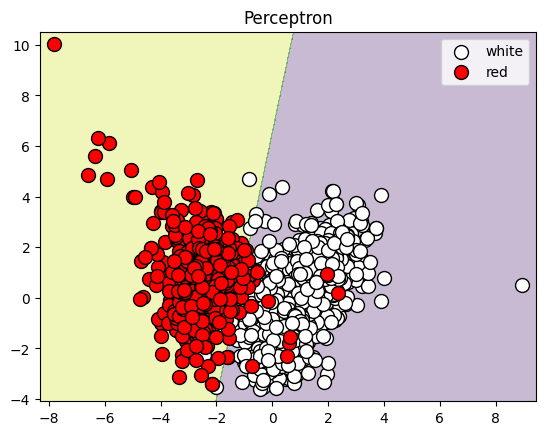

In [12]:
# EXTRA: Visualizar a superfície de decisão

# Função para plotar a superfície de decisão
def plot_decision(X, y, model):
        # Determina os limites para as dimensões dos dados
        x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  
        x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 
        
        # Para desenhar a superfície de decisão, cria uma grade de pontos que cobre toda a área de interesse.
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),  
                                np.arange(x2_min, x2_max, 0.01))  

        # Após criar a grade, o modelo Perceptron prevê a classe de cada ponto na grade.
        grid = np.c_[xx1.ravel(), xx2.ravel()] 

        Z = model.predict(grid)  
        Z = Z.reshape(xx1.shape)  
        
        # Plota a superfície de decisão como um contorno preenchido
        plt.contourf(xx1, xx2, Z, alpha=0.3)
        
        # Plota os dados de teste, colorindo os pontos de acordo com suas classes
        plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 
                        color='white', edgecolors='k', marker='o', s=100, label='white')  # Pontos da classe Salmão
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 
                        color='red', edgecolors='k', marker='o', s=100, label='red')  # Pontos da classe Robalo
        
        plt.legend() 
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        plt.title('Perceptron')
        plt.show()

# Plotar a superfície de decisão chamando a função plot_decision
plot_decision(X_test_pca, y_test, perceptron)
